In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT

#import numpy as np
import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution

In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

-----------------------



NORMAL DISTRIBUTION


-------------------

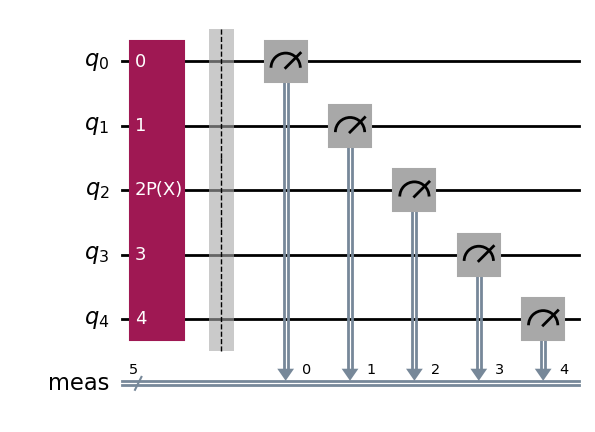

In [3]:
#initializing  quantum circuit
qc = QuantumCircuit(5)   #N = 5 qubits. N=5 classical bits

#building the circuit

#Defining parameteres to the NormalDistribution() function

#qc = NormalDistribution( 5, mu = 0, sigma = 1, bounds=(-1, 1))#where 5 is the number of qubits

qc = NormalDistribution( 5)#where 5 is the number of qubits


qc.measure_all()

qc.draw("mpl")


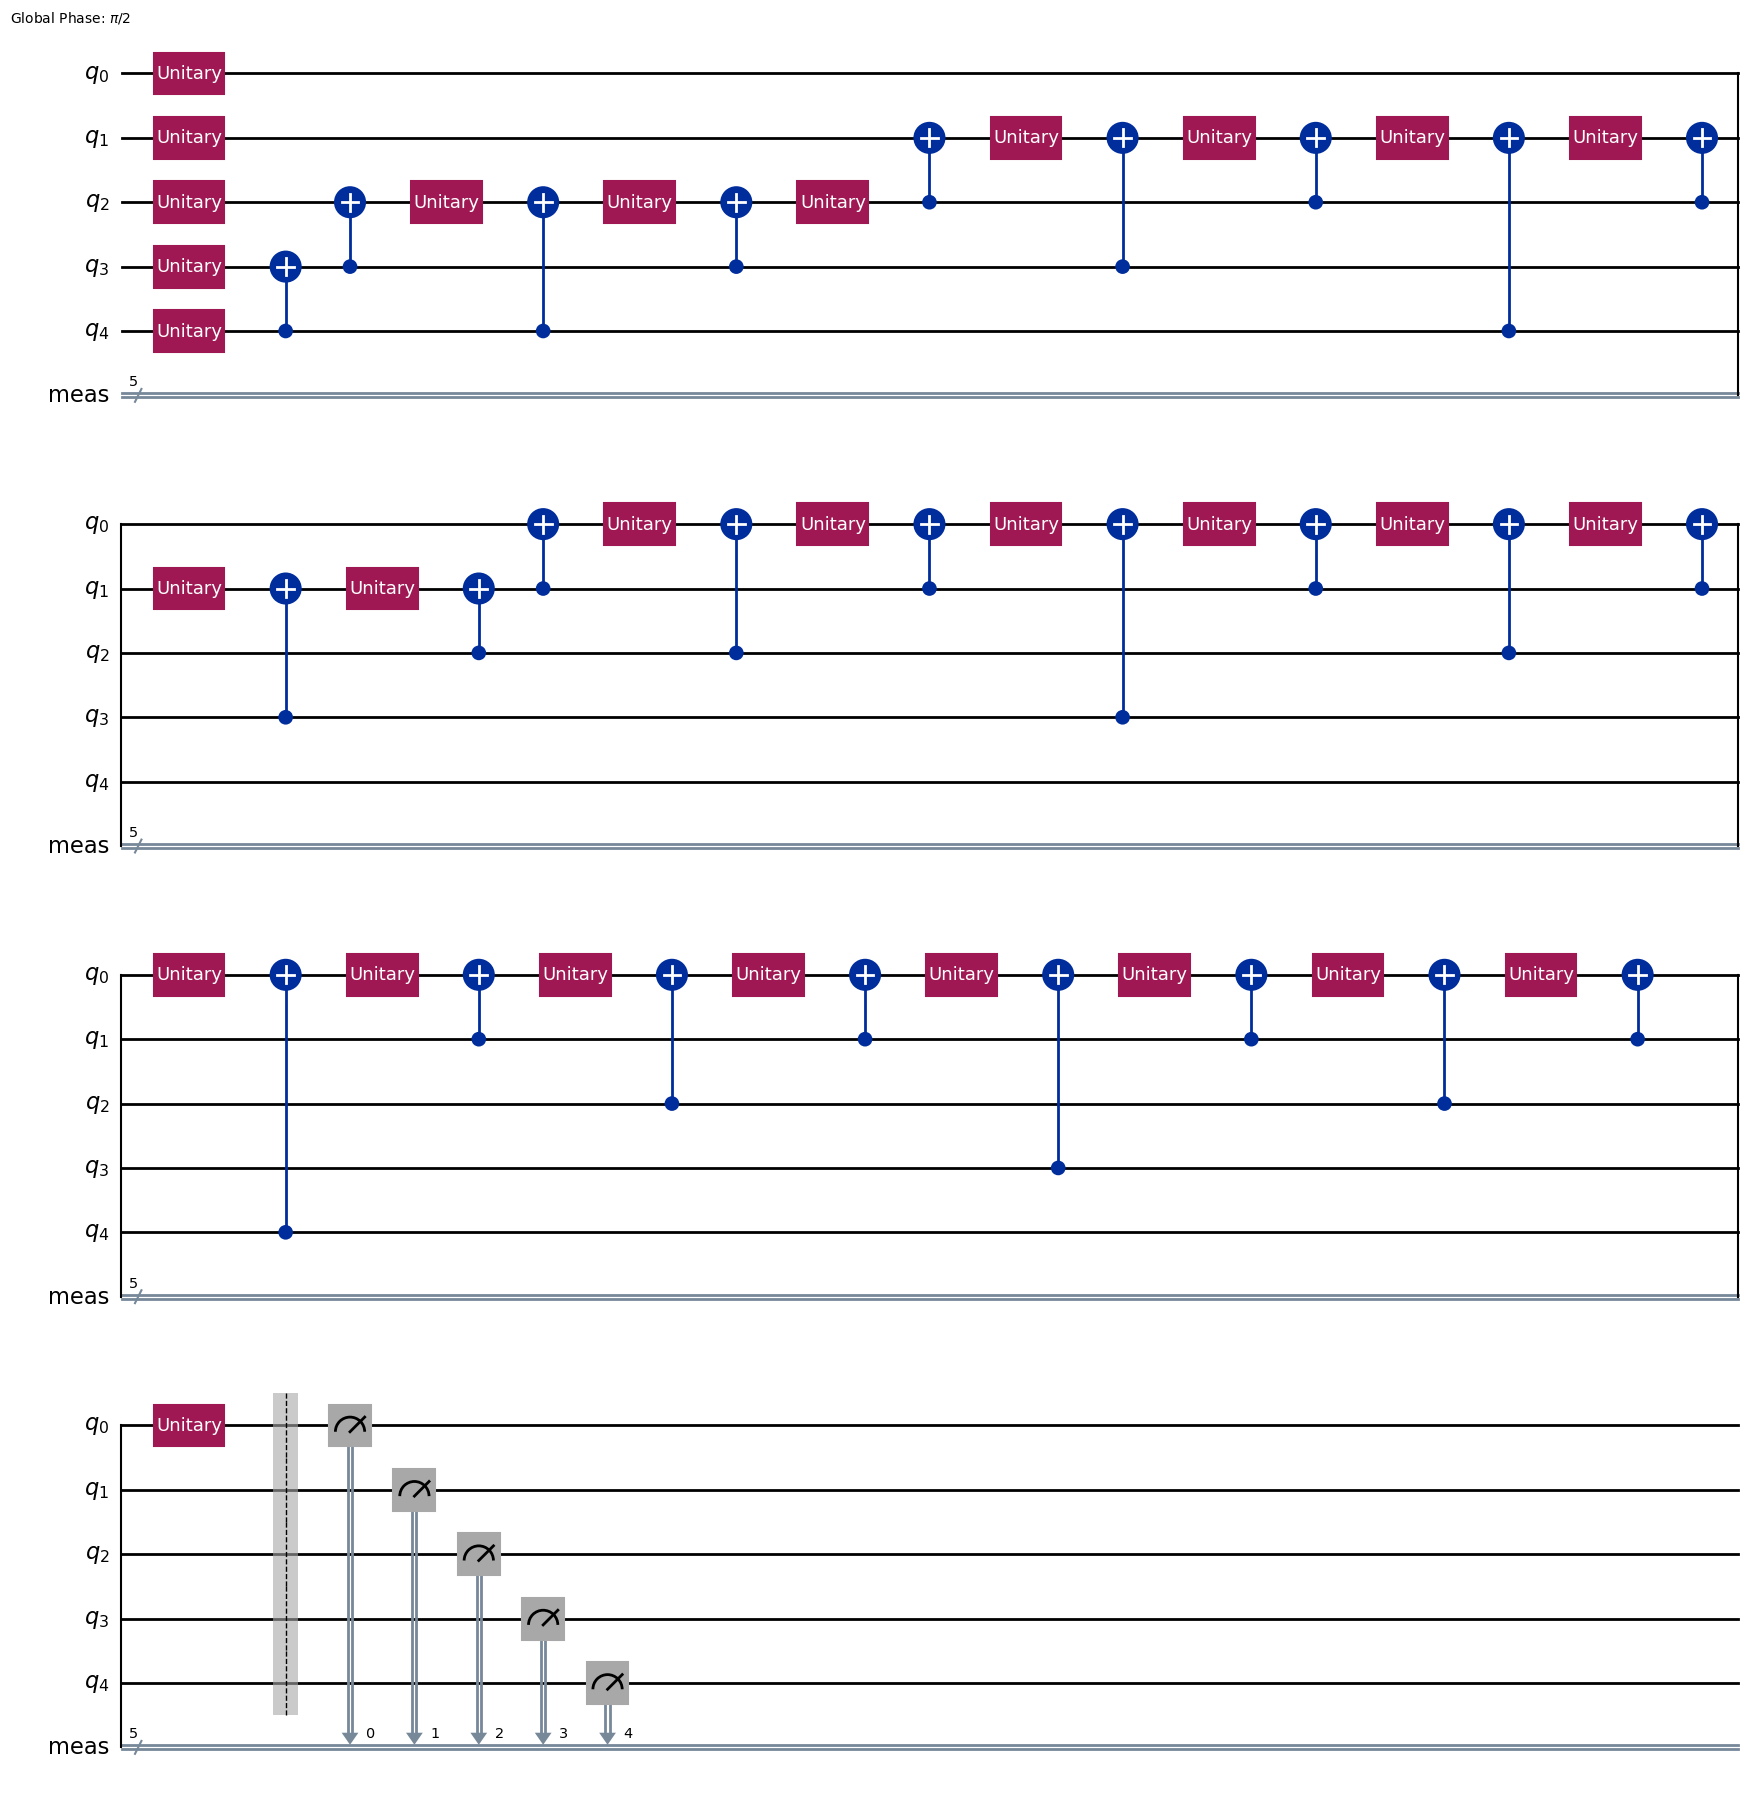

In [4]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")


#print(circuit)

In [5]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)

RESULT  {'00000': 11, '10000': 33, '00111': 29, '01100': 29, '10001': 38, '01111': 32, '10110': 37, '00101': 31, '01000': 35, '01101': 44, '01110': 33, '10101': 42, '11101': 27, '00110': 30, '11010': 36, '01011': 43, '10100': 28, '11001': 31, '00100': 31, '11011': 36, '10010': 31, '10111': 32, '00010': 25, '11000': 31, '01001': 27, '00011': 29, '11111': 24, '01010': 32, '11110': 17, '00001': 30, '10011': 38, '11100': 28}


Normal Distribution output 
-------------



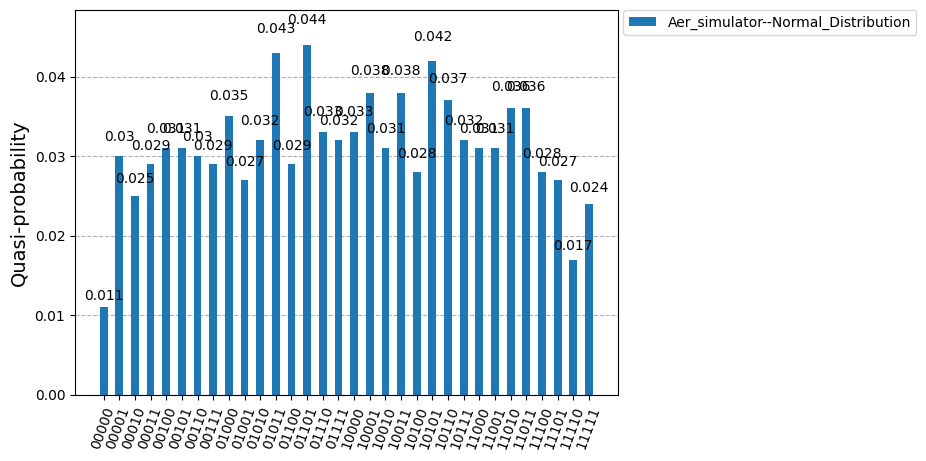

In [6]:
#Printing the results to the normal distribution function


print('Normal Distribution output ')
print('-------------\n')


plot_distribution([counts], legend = ['Aer_simulator--Normal_Distribution'])

In [7]:
#Number of objects with distinct values


sortedcounts = [] 
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i==j):
            sortedcounts.append(counts.get(j))

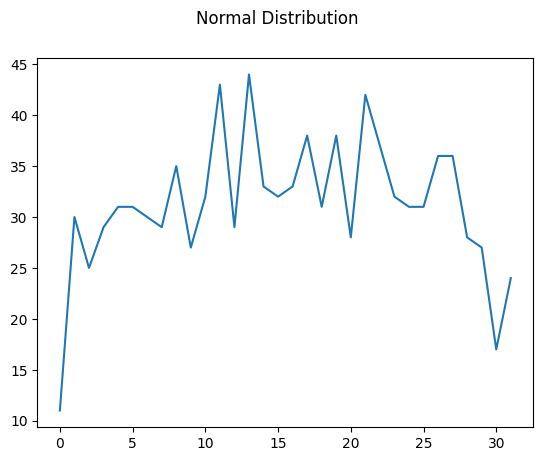

In [8]:
#title

plt.suptitle('Normal Distribution')

#plot

plt.plot(sortedcounts)
plt.show()

---------------------------



UNIFORM DISTRIBUTION


-------------------------

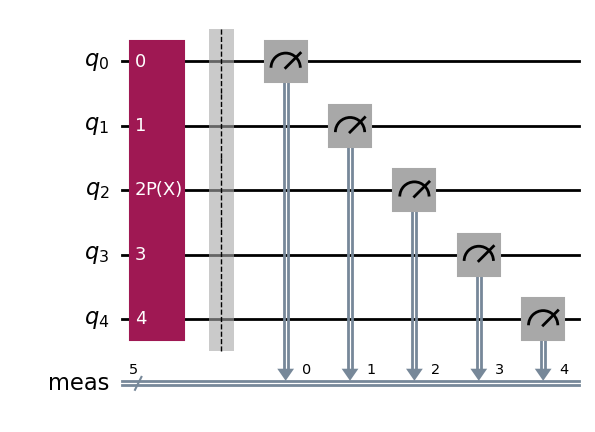

In [9]:
#Restarting the circuit

qc = QuantumCircuit(5)
qc = UniformDistribution(5)

qc.measure_all()

qc.draw("mpl")


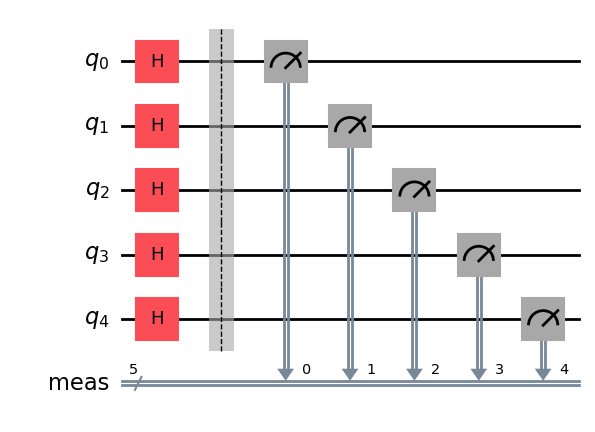

In [10]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")


In [11]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)

RESULT  {'11000': 36, '10000': 28, '00010': 25, '10001': 30, '11001': 28, '00000': 45, '11110': 32, '00011': 30, '11011': 34, '10101': 32, '10100': 32, '01110': 34, '11100': 41, '00101': 33, '11101': 46, '00110': 29, '10011': 44, '01101': 30, '01011': 33, '10010': 40, '01100': 23, '10111': 22, '01000': 27, '01111': 26, '11111': 41, '01001': 28, '01010': 22, '11010': 26, '10110': 28, '00001': 23, '00111': 31, '00100': 21}


Unitary Distribution output 
-------------



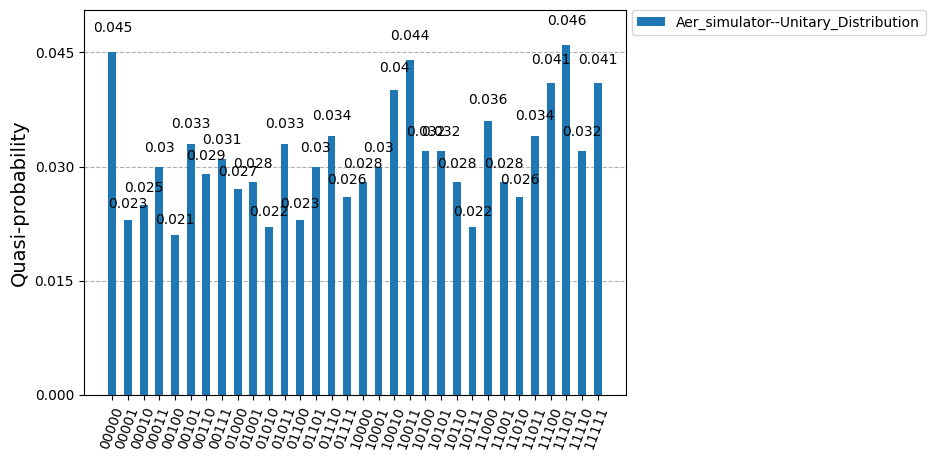

In [12]:
print('Unitary Distribution output ')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--Unitary_Distribution'])


In [13]:
sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i==j):
            sortedcounts.append(counts.get(j))

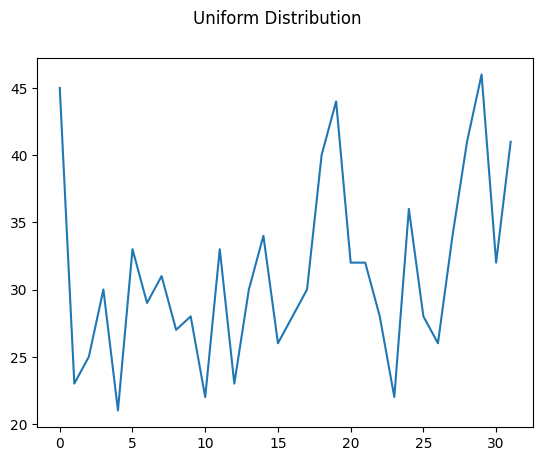

In [14]:
#Title

plt.suptitle('Uniform Distribution')

plt.plot(sortedcounts)
plt.show()


------------------------

LOG-NORMAL DISTRIBUTION

-----------------------

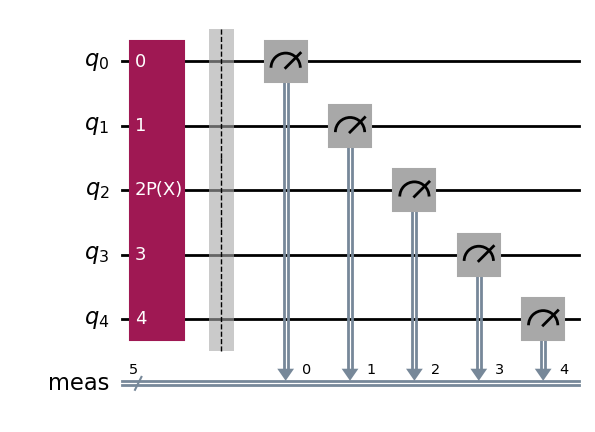

In [15]:
#Restart the circuit

qc = QuantumCircuit(5)

qc = LogNormalDistribution(5) #number of target qubits=5


qc.measure_all()

qc.draw("mpl")


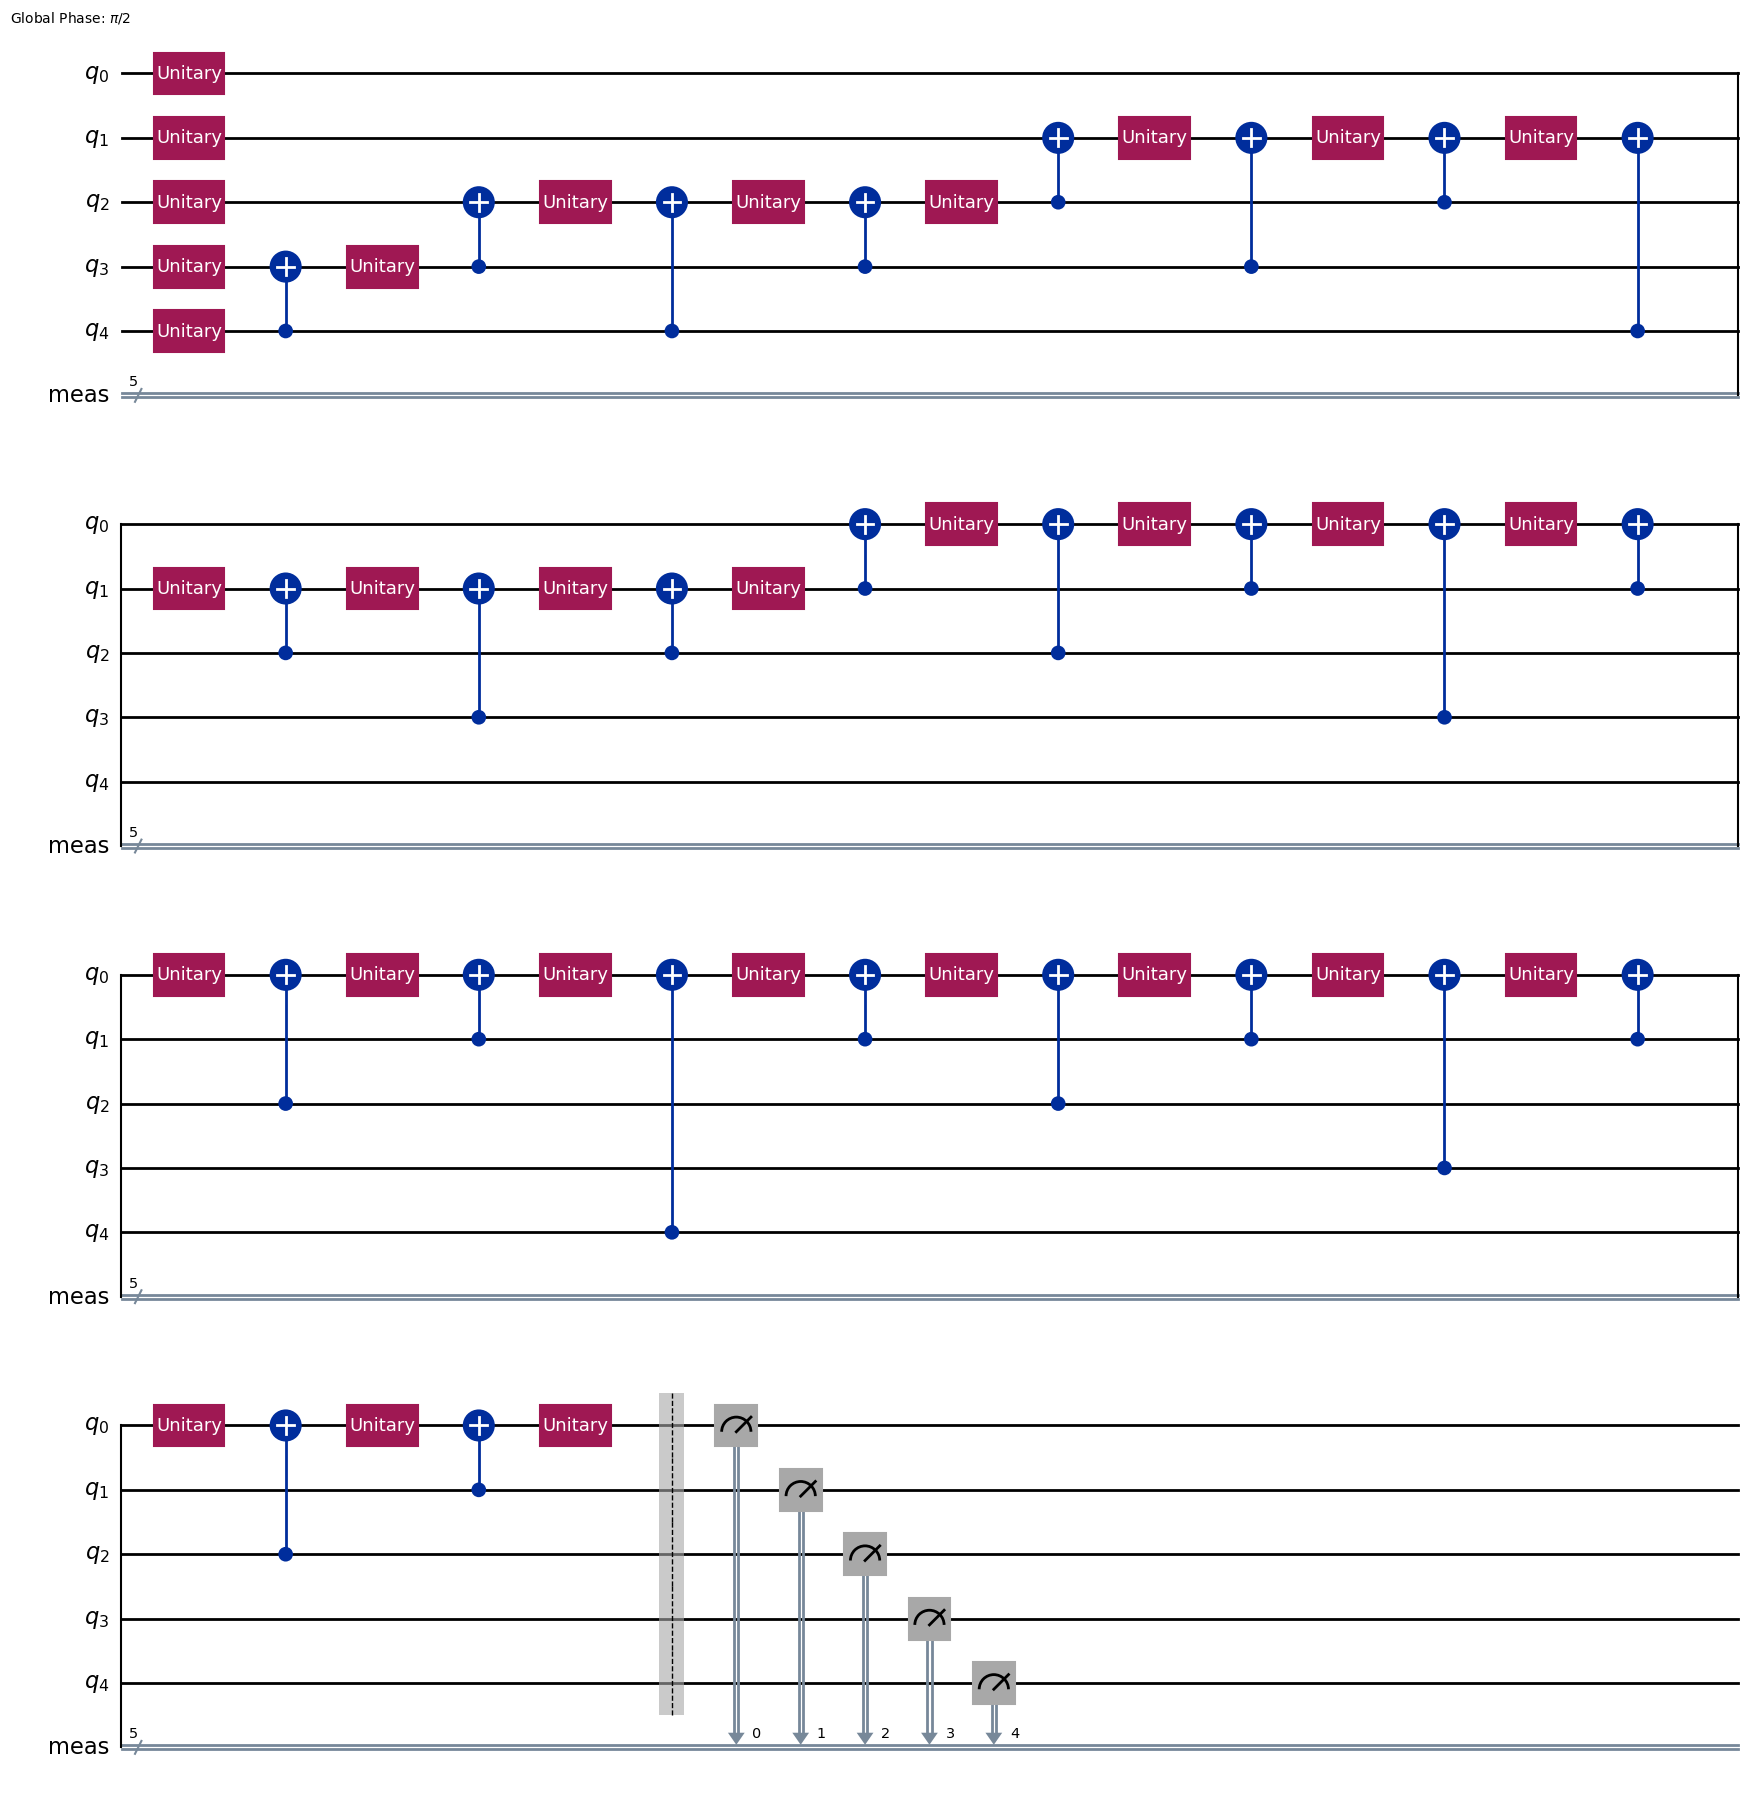

In [16]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [17]:

job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)


RESULT  {'10010': 39, '01011': 47, '01100': 43, '11110': 30, '10100': 37, '10001': 30, '00101': 30, '01001': 37, '00110': 30, '10111': 27, '10101': 25, '10000': 45, '10110': 41, '01110': 40, '00100': 20, '01010': 46, '00111': 34, '11100': 20, '01000': 41, '11111': 26, '01101': 42, '11011': 37, '10011': 35, '11001': 26, '11010': 40, '11101': 21, '00011': 20, '01111': 44, '00010': 10, '11000': 36, '00001': 1}


LogNormal Distribution output 
-------------



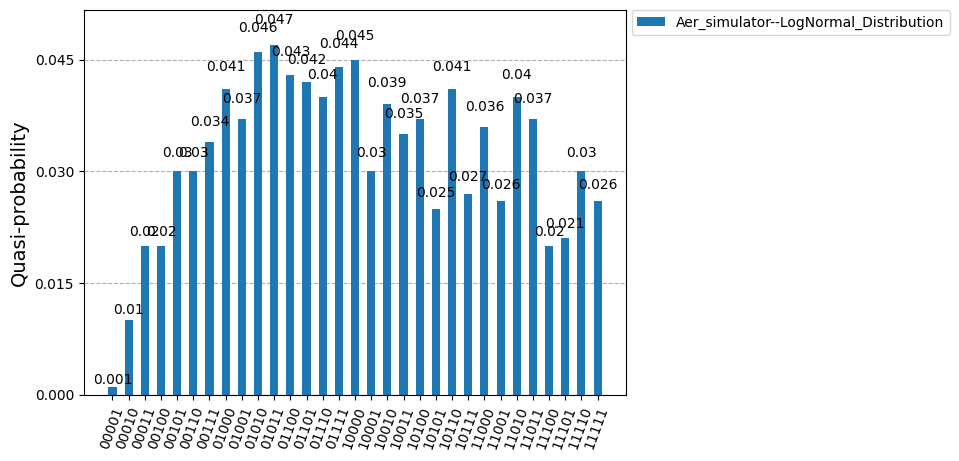

In [18]:
print('LogNormal Distribution output ')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--LogNormal_Distribution'])


In [19]:
sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if (i==j):
            sortedcounts.append(counts.get(j))

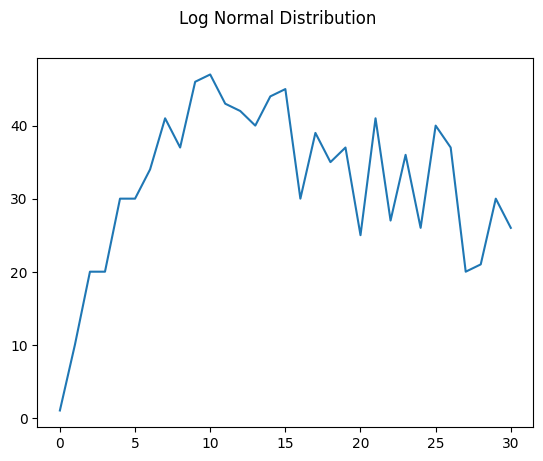

In [20]:
#title

plt.suptitle('Log Normal Distribution')
plt.plot(sortedcounts)
plt.show()